<a href="https://colab.research.google.com/github/dataqueenpend/DS_From_Zero_To_Hero/blob/gh-pages/Unsupervised_learning_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unsupervised learning in Python

course by DataCamp

modified learning notes and solved exercises by me


> Say you have a collection of customers with a variety of characteristics such as age, location, and financial history, and you wish to discover patterns and sort them into clusters. 

> Or perhaps you have a set of texts, such as wikipedia pages, and you wish to segment them into categories based on their content.

This is the world of unsupervised learning, called as such because you are not guiding, or supervising, the pattern discovery by some prediction task, but instead uncovering hidden structure from unlabeled data.

##Clustering for dataset exploration

**Supervised vs unsupervised learning**

An example of **supervised learning** is using the measurements of tumors to classify them as benign or cancerous. In this case, the pattern discovery is guided, or "supervised", so that the patterns are as useful as possible for predicting the label: benign or cancerous. 

**Unsupervised learning**, *in contrast, is learning without labels*. 

It is pure pattern discovery, unguided by a prediction task.


Throughout this course, datasets like this will be written as two-dimensional numpy arrays.
* The columns of the array will correspond to the features.
* The measurements for individual plants are the samples of the dataset. These correspond to rows of the array.

**k-means clustering**

k-means finds a specified number of clusters in the samples. It's implemented in the scikit-learn or "sklearn" library. 

**k-means clustering with scikit-learn**

* import kmeans from scikit-learn
```
from sklearn.cluster import KMeans
```

* create a kmeans model, specifying the number of clusters you want to find
```
model = KMeans(n_clusters=3)
```

(Let's specify 3 clusters, since there are three species of iris)


* call the fit method of the model, passing the array of samples

```
model.fit(samples)
```
```
KMeans(algorithm='auto', ...)
```

> This fits the model to the data, by locating and remembering the regions where the different clusters occur

* use the predict method of the model on these same samples. This returns a cluster label for each sample, indicating to which cluster a sample belongs. Let's assign the result to labels, and print it out.

```
labels = model.predict(samples)
print(labels)
```
```
[0 0 1 1 0 1 2 1 0 1 ...]
```

**Cluster labels for new samples**

If someone comes along with some new samples, **k-means can determine to which clusters they belong without starting over**. k-means does this *by remembering the mean (or average) of the samples in each cluster*. These are called the "**centroids**". New samples are assigned to the cluster whose centroid is closest.

* To assign the new samples to the existing clusters, pass the array of new samples to the predict method of the kmeans model. This returns the cluster labels of the new samples.

```
print(new_samples)
[[ 5.7 4.4 1.5 0.4]
[ 6.5 3. 5.5 1.8]
[ 5.8 2.7 5.1 1.9]]
```
```
new_labels = model.predict(new_samples)
print(new_labels)
[0 2 1]
```

**Scatter plots**

Later we'll learn how to evaluate quality of clustering.  But for now, let's visualize our clustering of the iris samples using scatter plots. 

> Here is a scatter plot of the sepal length vs petal length of the iris samples. Each point represents an iris sample, and is colored according to the cluster of the sample.

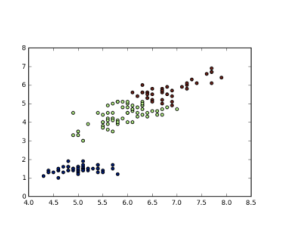



Get the x- and y- co-ordinates of each sample. 
* Sepal length is in the 0th column of the array, 
* while petal length is in the 2nd column. 

Now call the plt dot scatter function, passing the x- and y- co-ordinates and specifying c=labels to color by cluster label. 

```
import matplotlib.pyplot as plt
xs = samples[:,0]
ys = samples[:,2]
plt.scatter(xs, ys, c=labels)
plt.show()
```

**Clustering 2D points**

Create a KMeans model to find 3 clusters, and fit it to the data points. After the model has been fit, you'll obtain the cluster labels for some new points using the .predict() method.

* Import KMeans from sklearn.cluster.
* Using KMeans(), create a KMeans instance called model to find 3 clusters. To specify the number of clusters, use the n_clusters keyword argument.
* Use the .fit() method of model to fit the model to the array of points points.
* Use the .predict() method of model to predict the cluster labels of new_points, assigning the result to labels.

```
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)
```

```
<script.py> output:
    [1 2 0 1 2 1 2 2 2 0 1 2 2 0 0 2 0 0 2 2 0 2 1 2 1 0 2 0 0 1 1 2 2 2 0 1 2
     2 1 2 0 1 1 0 1 2 0 0 2 2 2 2 0 0 1 1 0 0 0 1 1 2 2 2 1 2 0 2 1 0 1 1 1 2
     1 0 0 1 2 0 1 0 1 2 0 2 0 1 2 2 2 1 2 2 1 0 0 0 0 1 2 1 0 0 1 1 2 1 0 0 1
     0 0 0 2 2 2 2 0 0 2 1 2 0 2 1 0 2 0 0 2 0 2 0 1 2 1 1 2 0 1 2 1 1 0 2 2 1
     0 1 0 2 1 0 0 1 0 2 2 0 2 0 0 2 2 1 2 2 0 1 0 1 1 2 1 2 2 1 1 0 1 1 1 0 2
     2 1 0 1 0 0 2 2 2 1 2 2 2 0 0 1 2 1 1 1 0 2 2 2 2 2 2 0 0 2 0 0 0 0 2 0 0
     2 2 1 0 1 1 0 1 0 1 0 2 2 0 2 2 2 0 1 1 0 2 2 0 2 0 0 2 0 0 1 0 1 1 1 2 0
     0 0 1 2 1 0 1 0 0 2 1 1 1 0 2 2 2 1 2 0 0 2 1 1 0 1 1 0 1 2 1 0 0 0 0 2 0
     0 2 2 1]
```

> You've successfully performed k-Means clustering and predicted the labels of new points. But it is not easy to inspect the clustering by just looking at the printed labels. A visualization would be far more useful.

**Inspect your clustering**

* Import matplotlib.pyplot as plt.
* Assign column 0 of new_points to xs, and column 1 of new_points to ys.
* Make a scatter plot of xs and ys, specifying the c=labels keyword arguments to color the points by their cluster label. Also specify alpha=0.5.
* Compute the coordinates of the centroids using the .cluster_centers_ attribute of model.
* Assign column 0 of centroids to centroids_x, and column 1 of centroids to centroids_y.
* Make a scatter plot of centroids_x and centroids_y, using 'D' (a diamond) as a marker by specifying the marker parameter. Set the size of the markers to be 50 using s=50.

```
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys, c=labels, alpha=0.5)
plt.show()
# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()
```

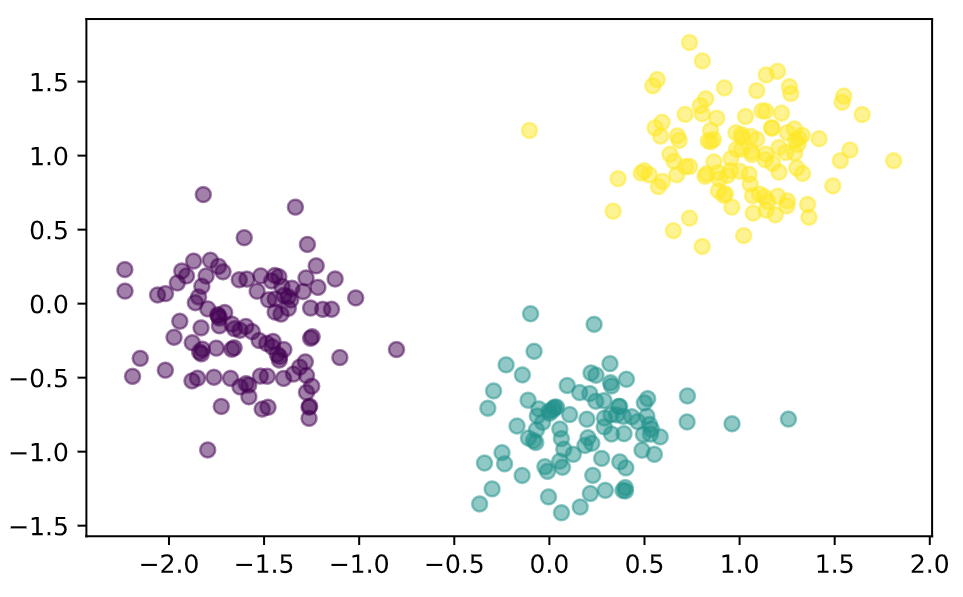

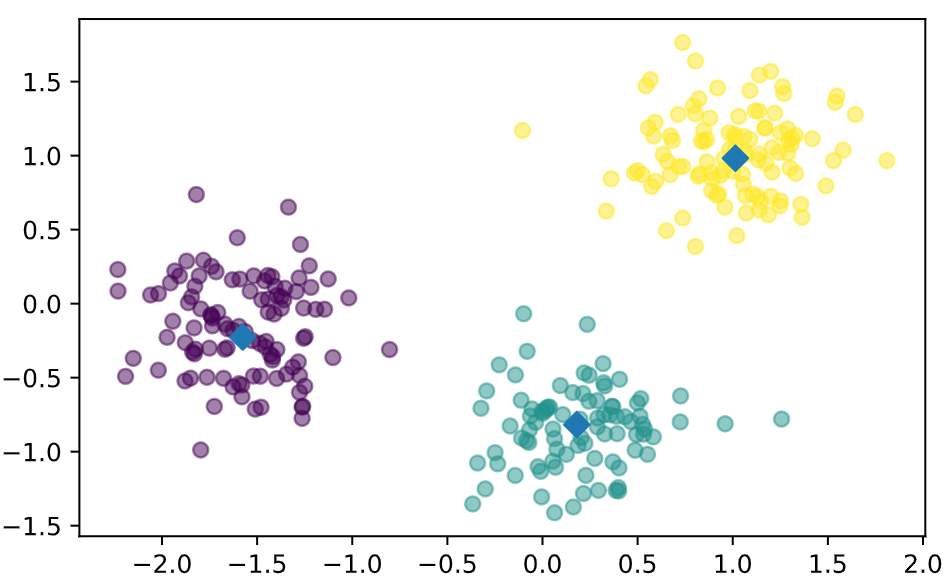

> The clustering looks great! But how can you be sure that 3 clusters is the correct choice? In other words, how can you evaluate the quality of a clustering?

##Visualization with hierarchical clustering and t-SNE

##Decorrelating your data and dimension reduction

##Discovering interpretable features